In [1]:
pip install mat73

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ------------------ --------------------- 1.3/2.9 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 8.8 MB/s  0:00:00

   ---------------------------------------- 0/2 [h5py]
   -------------------- ------------------- 1/2 [mat73]
   ---------------------------------------- 2/2 [mat73]

Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!ls -lh /kaggle/input/pulsedb-balanced-training-and-testing/

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
file_path = '/kaggle/input/pulsedb-balanced-training-and-testing/VitalDB_AAMI_Test_Subset.mat'
tr_file_path = '/kaggle/input/pulsedb-balanced-training-and-testing/VitalDB_Train_Subset.mat'

In [4]:
!pip install mat73

# Load Data

In [5]:
import mat73

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path)
    print(data_dict.keys())
    print(data_dict['Subset'].keys())    
    print({k: np.array(v).shape for k,v in data_dict['Subset'].items()})
    
    # make Dataframe
    data_df = pd.DataFrame({k: np.array(v).tolist() for k,v in data_dict['Subset'].items()})    
    print(data_df.shape)
    print(data_df[:3])

    # fix columns
    data_df['Subject'] = data_df['Subject'].apply(lambda x: x[0])
    return data_df

In [6]:
data_df = load_mat_file(file_path)  # 666

dict_keys(['Subset'])
dict_keys(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Signals', 'Subject', 'Weight'])
{'Age': (666,), 'BMI': (666,), 'DBP': (666,), 'Gender': (666, 1), 'Height': (666,), 'SBP': (666,), 'Signals': (666, 3, 1250), 'Subject': (666, 1), 'Weight': (666,)}
(666, 9)
    Age   BMI        DBP Gender  Height         SBP  \
0  26.0  26.3  57.966649    [M]   183.9   99.987120   
1  26.0  26.3  58.320482    [M]   183.9  100.759058   
2  26.0  26.3  59.022303    [M]   183.9  102.019124   

                                             Signals      Subject  Weight  
0  [[0.36403973055607636, 0.3798729789472614, 0.4...  [p000238_1]   89.05  
1  [[0.29321360098768473, 0.2860885144086844, 0.2...  [p000238_1]   89.05  
2  [[0.3234821974411744, 0.32359610215460555, 0.3...  [p000238_1]   89.05  


In [7]:
# tr_data_df = load_mat_file(tr_file_path)  # 465480

# Subjects & Window Counts

In [8]:
data_df['Subject'].value_counts() # 116

p000238_1    10
p004428_1    10
p004582_1     9
p004065_1     7
p003982_1     7
             ..
p005030_1     3
p001176_1     3
p003832_1     3
p001075_1     3
p004829_1     3
Name: Subject, Length: 116, dtype: int64

# Vizualize Sample

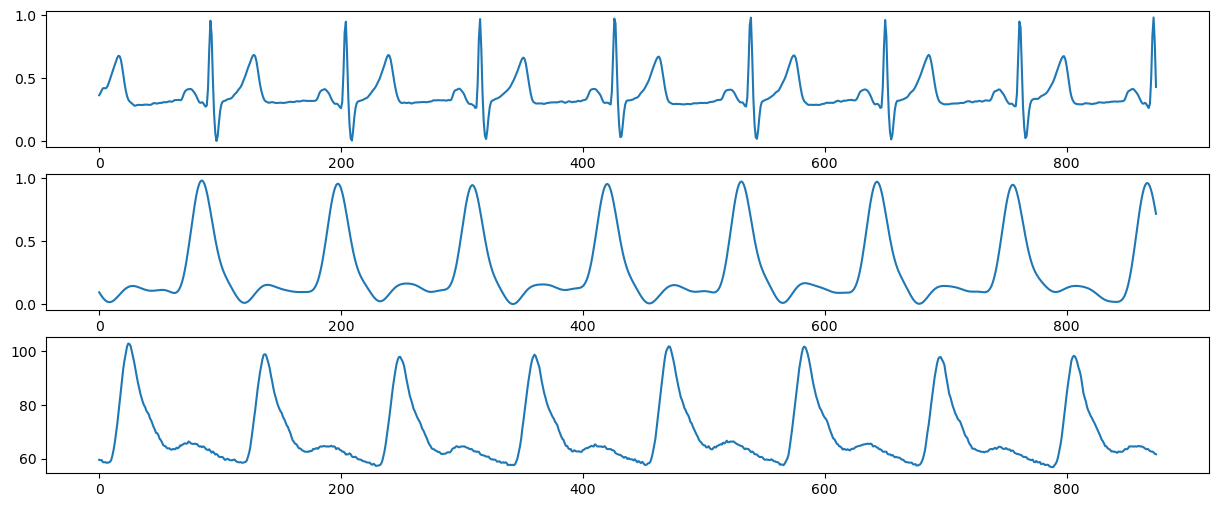

In [9]:
import matplotlib.pyplot as plt

signals = np.array(data_df['Signals'].iloc[0])

fig, axs = plt.subplots(3,1,figsize=(15,6))
axs[0].plot(signals[0][:875])
axs[1].plot(signals[1][:875])
axs[2].plot(signals[2][:875])

# Add Calculated / Derived Columns

In [10]:
def calc_map(arr):
    return np.mean(arr[-1])
    
data_df['true_map'] = data_df['Signals'].apply(calc_map)

# Target Distribution

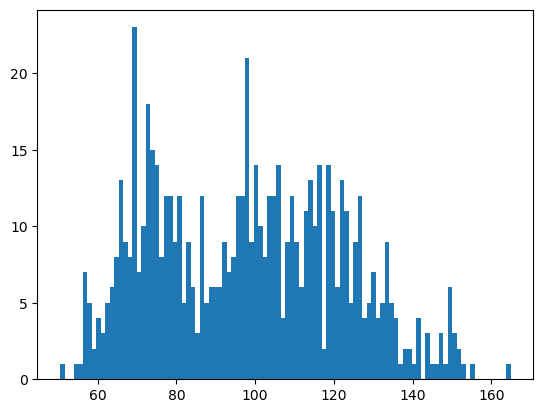

In [11]:
plt.hist(data_df['true_map'], bins=100);

Subject
p000238_1    None
p000241_1    None
p000284_1    None
p000336_1    None
p000345_1    None
             ... 
p005942_1    None
p005943_1    None
p005958_1    None
p006018_1    None
p006055_1    None
Name: true_map, Length: 116, dtype: object

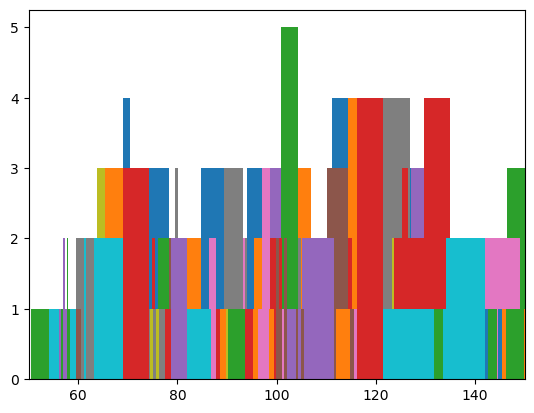

In [12]:
def plot_hist(sr):
    plt.hist(sr, bins=10)
    plt.xlim(50,150)
#     plt.show()

data_df.groupby('Subject')['true_map'].apply(plot_hist)